# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
# Use modules:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
# Read train dataset:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
#def display_images(batch):
# TODO - Your implementation here
def display_instances(batch, ax=None):
    '''
    Function to draw bounding boxes when the algorithm find: cars, pedestrians or cycles in the pictures.
    '''
    
    # Classes ID in the "label_map.pbtxt" file:
    color = {1:'red', 2:'blue', 4:'green'}
    
    # Split arrays:
    if ax is None:
        fig, ax = plt.subplots()
    image = batch["image"].numpy().astype("uint8")
    ax.imshow(image)

    #Boxes and classes:
    boxes = batch["groundtruth_boxes"].numpy()
    classes = batch["groundtruth_classes"].numpy()

    # Launch for in order to draw boundingboxes and select the correct color depending the image.
    for box, cont in zip(boxes, classes):
        ymin, xmin, ymax, xmax = box
        xy = (xmin*image.shape[1], ymin*image.shape[0])
        width = (xmax - xmin)*image.shape[1]
        height = (ymax - ymin)*image.shape[0]
        rectangle = patches.Rectangle(xy, width, height, linewidth=1, ec=color[cont], fc='none')
        ax.add_patch(rectangle)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

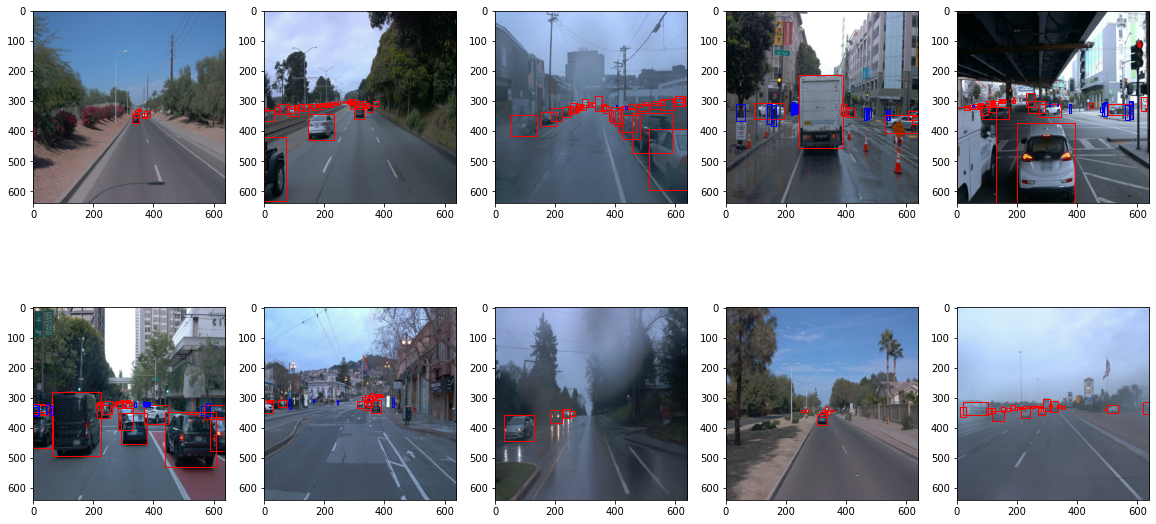

In [4]:
# Display 10 random images in dataset:
plt.rcParams['figure.figsize'] = [20, 10]
fig, axis = plt.subplots(2, 5) # 2 rows of five pictures.
# Draw 10 pictures with the inferences executed and the bounding boxes marked:
for i in range(10):
    for batch in dataset.shuffle(100, reshuffle_each_iteration=True).take(1):
        display_instances(batch, axis[i//5, i%5])
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

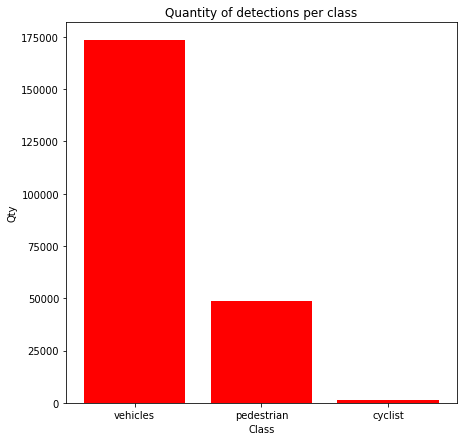

In [5]:
# Analysis of the data distribution:
def get_distribution(dataset, sample_size=10000):
    classes = np.array([])
    for batch in dataset.take(sample_size):
        classes = np.append(classes, batch["groundtruth_classes"].numpy())
    return np.unique(classes, return_counts=True)

# Draw in a single graphic the calculated distribution:
# Configure the size of the plot:
plt.rcParams['figure.figsize'] = [7, 7]
# Count the classes detections:
classes, count = get_distribution(dataset)
# Used classes:
class_names = ['vehicles', 'pedestrian', 'cyclist']
# Draw the bar graphic with titles:
plt.bar(x=range(len(classes)), height=count, tick_label=class_names, color='r')
plt.title("Quantity of detections per class")
plt.xlabel("Class")
plt.ylabel("Qty")
plt.show()